# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of GME redditors.
* Basic analysis of the network of GME redditors.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import scipy



# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in details.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


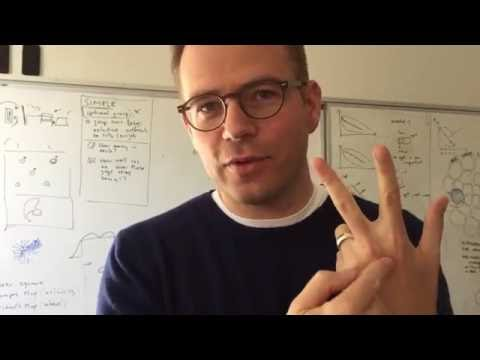

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

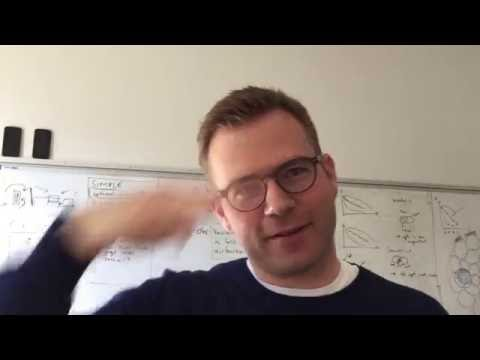

In [3]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in a Jupyter notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
>
><b> Answer: </b> Facebook (nodes = people, links = friendships), busroutes (nodes = stops, links = busses), power grid (nodes = power plants, links = cables)
>
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
><b> Answer: </b> A network of interest could nbe courses at DTU, where the nodes are the courses and links are requirements (requiered courses have a directed link to the course), the size is the number of courses at DTU and it can be mapped out. I care about because it shows which courses give access to the most new courses and what courses are needed for a specific course
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 


>
> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
><b> Answer: </b> A network representing people that know each other, each node is a person, this is very sparse as people only know a very small fraction of all people in the entire world
> There are more questions on Chapter 2 below.
> 

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

### NetworkX tutorial
see seperate notebook

### Königsberg Problem 
Which of the icons in Image 2.19 can be drawn without raising yourpencil from the paper, and without drawing any line more than once? Why?

> a) only two edges has an uneven number of nodes and must therefore be start and finish <br>
> c) all nodes have an even number of edges <br>
> d) only two nodes have an uneven number of edges

### Graph Representation
The adjacency matrix is a useful graph representation for many analytical calculations. However, when we need to store a network in a computer, we can save computer memory by offering the list of links in a Lx2 matrix, whose rows contain the starting and end point i and j of each link. Construct for the networks (a) and (b) in Imade 2.20:

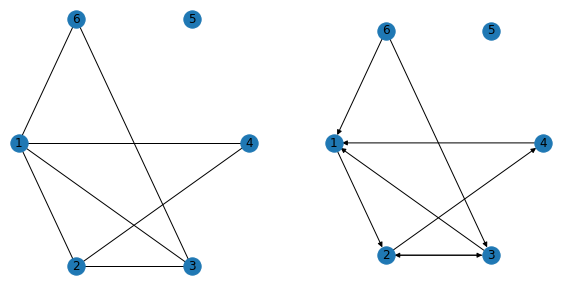

In [2]:
nodes = np.arange(1,7)
edges = [(1,2), (2, 3), (2,4), (3,1), (3,2), (4,1), (6,1), (6,3)]

G1 = nx.DiGraph()
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)
G2 = nx.Graph(G1)

plt.figure(figsize = (10, 5))
plt.subplot(121)
nx.draw_shell(G2, with_labels = True)
plt.subplot(122)
nx.draw_shell(G1, with_labels = True)

In [3]:
bold = "\033[1m"
end = '\033[0m'

print(bold,"Adjacency matrix for undirected: \n", end, nx.linalg.graphmatrix.adjacency_matrix(G2).todense(), "\n")
print(bold,"Adjacency matrix for directed: \n", end, nx.linalg.graphmatrix.adjacency_matrix(G1).todense(), "\n")

print(bold, "Linked list for undirected: ", end, G2.edges, "\n")
print(bold, "Linked list for directed: ", end, G1.edges, "\n")

print(bold, "Average clustering coefficient for undirected: ", end, nx.average_clustering(G2), "\n")

print(bold, "Swapping 5 and 6: ", end)
print("Swapping the label of nodes 5 and 6 in the undirected graph, will swap the rows and columns of 5 and 6 inb the adjacency matrix and in the linked list all 5's are replaced with 6 and vice versa\n")

print(bold, "Adjacency matrix vs linked list: ", end)
print("In a linked list we will not have informatiuon about node 5 being present, as it has no edges, but it will appear in the adjacency matrix\n")

print(bold,"Paths of length 3", end)
A1 = nx.to_numpy_matrix(G2)
A2 = nx.to_numpy_matrix(G1)
# see for explanation of matrix stuff: https://quickmathintuitions.org/finding-paths-length-n-graph/
print(f"There are {(A1@A1@A1)[0,2]} paths of length 3 from 1 to 3 in the undirected graph")
print(f"There are {(A2@A2@A2)[0,2]} paths of length 3 from 1 to 3 in the directed graph\n")

cycles = [x for x in list(nx.simple_cycles(G2.to_directed())) if len(x) == 4]
print(bold, "Number of cycles with length 4: ", end, len(cycles))

 Adjacency matrix for undirected: 
  [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

 Adjacency matrix for directed: 
  [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

 Linked list for undirected:   [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)] 

 Linked list for directed:   [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)] 

 Average clustering coefficient for undirected:   0.6388888888888888 

 Swapping 5 and 6:  
Swapping the label of nodes 5 and 6 in the undirected graph, will swap the rows and columns of 5 and 6 inb the adjacency matrix and in the linked list all 5's are replaced with 6 and vice versa

 Adjacency matrix vs linked list:  
In a linked list we will not have informatiuon about node 5 being present, as it has no edges, but it will appear in the adjacency matrix

 Paths of length 3 
There are 7.0 paths of length 3 from 1 to 3 in the undirected graph
There 

### Bipartite networks

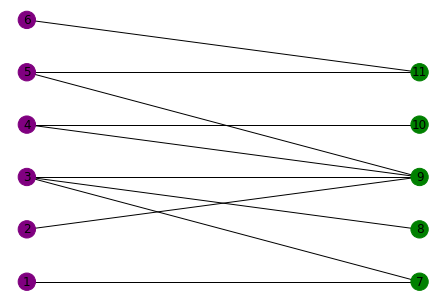

In [4]:
nodes = np.arange(1, 12)
edges = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
color_map = ["green" if x >=7 else "purple" for x in range(1, 12)]

X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True, node_color = color_map)
plt.show()

In [5]:
bold = "\033[1m"
end = '\033[0m'

print(bold,"Adjacency matrix:\n", end, nx.linalg.graphmatrix.adjacency_matrix(G).todense(), "\n")
print("Block diagnoal as nodes < 7 are not connected with each other and nodes >6 are not connected with each other\n")

purp_proj = nx.algorithms.bipartite.projected_graph(G, list(G.nodes)[:6])
green_proj = nx.algorithms.bipartite.projected_graph(G, list(G.nodes)[7:])
print(bold, "Projections", end)
print("Adjacency matrix of purple projection:\n", nx.to_numpy_matrix(purp_proj))
print("Adjacency matrix of green projection:\n", nx.to_numpy_matrix(green_proj), "\n")

print(bold, "Average degree", end)
print("Average degree of purple nodes: ", sum([G.degree[i] for i in range(1, 7)])/6)
print("Average degree of green nodes: ", sum([G.degree[i] for i in range(7, 12)])/5, "\n")

print(bold, "Average degree in projections", end)
print("Average degree in purple projection: ", sum([purp_proj.degree[i] for i in range(1, 7)])/6)
print("Average degree in green projection: ", sum([green_proj.degree[i] for i in range(7, 12)])/5)

 Adjacency matrix:
  [[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]] 

Block diagnoal as nodes < 7 are not connected with each other and nodes >6 are not connected with each other

 Projections 
Adjacency matrix of purple projection:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
Adjacency matrix of green projection:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]] 

 Average degree 
Average degree of purple nodes:  1.6666666666666667
Average degree of green nodes:  2.0 

 Average degree in projections 
Average degree in purple projection:  2.6666666666666665
Average degree in green projection:  2.0


# Part 3: Building the GME redditors network

Ok, enough with theory :) It is time to go back to our cool dataset it took us so much pain to download! And guess what? We will build the network of GME Redditors. Then, we will use some Network Science to study some of its properties.


> 
> *Exercise*: Build the network of Redditors discussing about GME on r\wallstreetbets. In this network, nodes correspond to authors of comments, and a direct link going from node _A_ to node _B_ exists if _A_ ever answered a submission or a comment by _B_. The weight on the link corresponds to the number of times _A_ answered _B_. You can build the network as follows:
>
> 1. Open the _comments dataset_ and the _submission datasets_ (the first contains all the comments and the second cointains all the submissions) and store them in two Pandas DataFrames.
> 2. Create three dictionaries, using the command ``dict(zip(keys,values))``, where keys and values are columns in your dataframes. The three dictionaries are the following:
>     * __comment_authors__: (_comment id_, _comment author_)
>     * __parent__:  (_comment id_ , _parent id_)
>     * __submission_authors__: (_submission id_, _submission author_)
>
> where above I indicated the (key, value) tuples contained in each dictionary.
>
> 3. Create a function that take as input a _comment id_ and outputs the author of its parent. The function does two things:
>     * First, it calls the dictionary __parent__, to find the _parent id_ of the comment identified by a given _comment id_. 
>     * Then, it finds the author of  _parent id_. 
>          * if the _parent id_ starts with "t1_", call the __comment_authors__ dictionary (for key=parent_id[3:])
>          * if the _parent id_ starts with "t3_", call the __submission_authors__ dictionars (for key=parent_id[3:])
>
> where by parent_id[3:], I mean that the first three charachters of the _parent id_ (either "t1_" or "t3_" should be ingnored).
>
> 4. Apply the function you created in step 3. to all the comment ids in your comments dataframe. Store the output in a new column, _"parent author"_, of the comments dataframe. 
> 5. For now, we will focus on the genesis of the GME community on Reddit, before all the hype started and many new redditors jumped on board. For this reason, __filter all the comments written before Dec 31st, 2020__. Also, remove deleted users by filtering all comments whose author or parent author is equal to "[deleted]". 
> 6. Create the weighted edge-list of your network as follows: consider all comments (after applying the filtering step above), groupby ("_author_", _"parent author"_) and count. 
> 7. Create a [``DiGraph``](https://networkx.org/documentation/stable//reference/classes/digraph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) to create a weighted, directed, graph starting from the edgelist you created in step 5.

In [51]:
# data
comments_org = pd.read_csv("Data/week1/gme_reddit_comments.csv", parse_dates = ["creation_date"])
submissions_org = pd.read_csv("Data/week1/gme_reddit_submissions.csv", parse_dates = ["creation_date"])

# dictionaries
comment_authors = dict(zip(comments_org["id"], comments_org["author"]))
parent = dict(zip(comments_org["id"], comments_org["parent_id"]))
submissions_authors = dict(zip(submissions_org["id"], submissions_org["author"]))

# function for getting author of parent id
def get_parent_author(comment_id):
    parent_id = parent[comment_id]
    t_parent_id = parent_id[:3]
    parent_id = parent_id[3:]
    
    try:
        if t_parent_id == "t1_":
            return comment_authors[parent_id]# if parent_id in comment_authors.keys else None
        elif t_parent_id == "t3_":
            return submissions_authors[parent_id]
        else:
            return -1
    except KeyError:
        return -1
    
# create parent_author column in comments dataframe
comments = comments_org
comments["parent_author"] = list(map(get_parent_author, comments["id"])) #get_parent_author(comments.id)

# remove unwanted authors
comments = comments[comments.parent_author != -1] # remove rows with keyerror (around 14k rows)
comments = comments[comments.creation_date <= "2020-12-31"] # remove comments from after 31/12-2020
comments = comments[(comments.author != "[deleted]") & (comments.parent_author != "[deleted]")]# remove deleted users


In [52]:
#Create the weighted edge-list of your network
comments_network = comments.groupby(["author", "parent_author"]).size()
comments_network = comments_network.reset_index()
comments_network.columns = ["author", "parent_author","weight"]
comments_network

,author,parent_author,weight
0,----The_Truth-----,BorpleFlorpleWho,1
1,----The_Truth-----,CD2471,1
2,----The_Truth-----,DeepFuckingValue,1
3,---MrP---,Nasty_Nate2324,1
4,---MrP---,Uberkikz11,2
...,...,...,...
96513,zyroyoyz,Stonksflyingup,1
96514,zyx1989,Youkiame,1
96515,zyx2239,dcluttrell,1
96516,zzman14,hrifandi,1


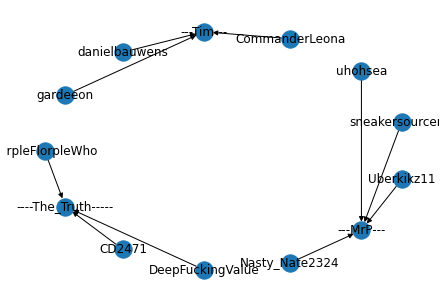

In [53]:
# plot a subset of the users to view graph
comments1 = comments_network[:10]
G_subset = nx.from_pandas_edgelist(comments1, "parent_author", "author", "weight", create_using = nx.DiGraph())
nx.draw_shell(G_subset, with_labels = True)
plt.show()

# create the complete graph - is the direction correct? should it go from parent_author to author following a tree structure?
G = nx.from_pandas_edgelist(comments_network, "parent_author", "author", "weight", create_using = nx.DiGraph())

# Part 4: Preliminary analysis of the GME redditors network

We begin with a preliminary analysis of the network.

> 
> *Exercise: Basic Analysis of the Redditors Network*
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


<b> Answers </b>
> * The graph has a direction to indicate which users commented on whuich other users posts


In [55]:
# answers to question 2 and 3
bold = "\033[1m"
end = '\033[0m'

N_nodes = len(G.nodes)
N_links = len(G.edges)
max_links = N_nodes*(N_nodes-1)/2
network_density = N_links/max_links
in_degrees = list(dict(G.in_degree()).values())
out_degrees = list(dict(G.out_degree()).values())


print(bold, "Number of nodes in the network: ", end, N_nodes)
print(bold, "The total number of links: ", end, N_links)
print(bold, "Max/Potentiel number of links: ", end, max_links)
print(bold, "Density of the network: ", end, network_density)
# stats for degrees
print(bold, "Stats for in degree of network:",end)
print("\tMean = ", np.mean(in_degrees))
print("\tMedian = ", np.median(in_degrees))
print("\tMode = ", max(in_degrees, key = in_degrees.count))
print("\tMin = ", min(in_degrees))
print("\tMax = ", max(in_degrees))
print(bold, "Stats for out degree of network:",end)
print("\tMean = ", np.mean(out_degrees))
print("\tMedian = ", np.median(out_degrees))
print("\tMode = ", max(out_degrees, key = out_degrees.count))
print("\tMin = ", min(out_degrees))
print("\tMax = ", max(out_degrees))



 Number of nodes in the network:   30039
 The total number of links:   96518
 Max/Potentiel number of links:   451155741.0
 Density of the network:   0.0002139349923511225
 Stats for in degree of network: 
	Mean =  3.2130896501215087
	Median =  1.0
	Mode =  1
	Min =  0
	Max =  787
 Stats for out degree of network: 
	Mean =  3.2130896501215087
	Median =  0.0
	Mode =  0
	Min =  0
	Max =  2826


In [120]:
# top redditors 
top = 5 #number of user to rank

top_redditors = comments.groupby(["author"]).agg({'score' : ['mean'], 'creation_date':['min', 'max']})
top_redditors.columns = ["avg_score", "date_joined", "date_left"]
top_redditors["days_active"] = top_redditors["date_left"] - top_redditors["date_joined"]
top_redditors = top_redditors.join(pd.DataFrame(G.in_degree(), columns = ["author", "in_degree"]).set_index("author"), how = "left")
top_redditors = top_redditors.join(pd.DataFrame(G.out_degree(), columns = ["author", "out_degree"]).set_index("author"), how = "left")
top_redditors = top_redditors.reset_index()

display(f"Top {top} redditors by in-degree: ", top_redditors.sort_values("in_degree", ascending=False)[:top]) 
display(f"Top {top} redditors by out-degree: ", top_redditors.sort_values("out_degree", ascending=False)[:top]) 


'Top 5 redditors by in-degree: '

,author,avg_score,date_joined,date_left,days_active,in_degree,out_degree
14928,WSBVoteBot,1.000000,2020-04-29,2020-12-31,246 days,787,24
717,Ackilles,3.884910,2020-09-06,2020-12-31,116 days,478,358
1386,AutoModerator,1.403816,2020-01-02,2020-12-31,364 days,460,64
26868,sneakersourcerer,1.448980,2020-09-20,2020-12-31,102 days,443,525
13000,Stonksflyingup,2.966176,2020-09-09,2020-12-31,113 days,404,465


'Top 5 redditors by out-degree: '

,author,avg_score,date_joined,date_left,days_active,in_degree,out_degree
15497,Youkiame,2.200000,2020-10-09,2020-12-31,83 days,5,2826
3854,DeepFuckingValue,1.764286,2020-01-01,2020-12-22,356 days,108,2549
9898,OPINION_IS_UNPOPULAR,3.250000,2020-06-05,2020-11-30,178 days,8,1468
25582,rapsfan1515,1.254237,2020-10-10,2020-10-12,2 days,89,1267
20890,horny131313,1.942857,2020-11-28,2020-12-31,33 days,90,937


> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.

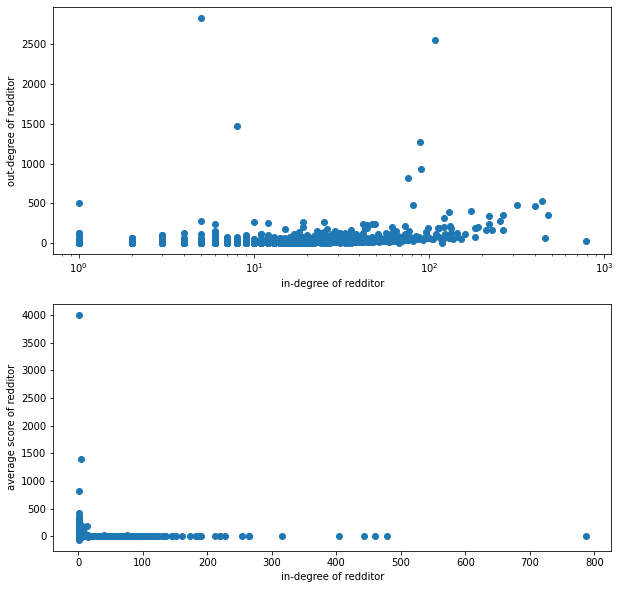

In [125]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

# scatter plot for in- versus out degree
ax = plt.subplot(2, 1, 1)
ax.scatter(top_redditors.in_degree, top_redditors.out_degree)
ax.set_xlabel("in-degree of redditor")
ax.set_ylabel("out-degree of redditor")
# ax.set_yscale("log")
ax.set_xscale("log")


# scatter plot for in-degree vs average score
ax = plt.subplot(2, 1, 2)
ax.scatter(top_redditors.in_degree, top_redditors.avg_score)
ax.set_xlabel("in-degree of redditor")
ax.set_ylabel("average score of redditor")

plt.show()